In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importing Data Frame
df = pd.read_pickle('/Users/javieraquezada/Desktop/Retail Analysis/02 Data/cleaned_sample.pkl')

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
df

Transaction_ID  Customer_ID             Name                 Email  \
77037          8154457        18745      Tara Wright  Jeffrey100@gmail.com   
106765         8896002        82300    Daniel Patton  Cheyenne19@gmail.com   
187652         1820950        49584  Kathleen Watson     Billy97@gmail.com   
184582         9448636        74580  Steven Sullivan   Gabriel71@gmail.com   
290216         8088692        72061       Heather Yu    Daniel32@gmail.com   
...                ...          ...              ...                   ...   
265038         8840651        38662      Kathy Ellis  Michelle59@gmail.com   
78419          7259568        91292    Megan Collins  Michaela13@gmail.com   
210348         9767759        30124     James Warner     Jamie63@gmail.com   
133716         2867588        94521  Gina Villanueva    Daniel17@gmail.com   
136190         2178321        35279    Jordan Reeves   Jonathan1@gmail.com   

               Phone                          Address        City  \
77037   6.443965e+09          474 Kevin Road Apt. 786     Chicago   
106765  1.792779e+09              717 Timothy Prairie    Brisbane   
187652  2.066960e+09  2069 Nicholas Prairie Suite 877  St. John's   
184582  8.490832e+09                912 Randall Manor   Saskatoon   
290216  7.141601e+09                1297 Willis Drive     Halifax   
...              ...                              ...         ...   
265038  8.856982e+09                 690 Kevin Course     Hamburg   
78419   8.443722e+09               346 Velazquez Rest     Chicago   
210348  8.068852e+09                0685 Albert Fords    Hamilton   
133716  7.696473e+09         513 Smith Rest Suite 565      London   
136190  8.187333e+09                3138 Turner Mills      Darwin   

                  State  Zipcode    Country  ...  Total_Amount  \
77037       Connecticut  14063.0        USA  ...   2350.802482   
106765  New South Wales  82508.0  Australia  ...    605.991344   
187652          Ontario  61208.0     Canada  ...    676.659578   
184582          Ontario  53361.0     Canada  ...    272.016496   
290216          Ontario  64745.0     Canada  ...   2394.895305   
...                 ...      ...        ...  ...           ...   
265038           Berlin  58244.0    Germany  ...   1752.600327   
78419       Connecticut  29933.0        USA  ...   1758.932459   
210348          Ontario  36526.0     Canada  ...   3172.002246   
133716          Ontario  97524.0     Canada  ...     78.200892   
136190  New South Wales  32732.0  Australia  ...   1950.065223   

       Product_Category      Product_Brand  \
77037             Books      HarperCollins   
106765         Clothing               Zara   
187652          Grocery              Pepsi   
184582       Home Decor  Bed Bath & Beyond   
290216          Grocery             Nestle   
...                 ...                ...   
265038      Electronics         Mitsubhisi   
78419          Clothing               Nike   
210348       Home Decor         Home Depot   
133716          Grocery             Nestle   
136190      Electronics          Whirepool   

                              Product_Type   Feedback  Shipping_Method  \
77037                              Fiction  Excellent         Standard   
106765                               Jeans  Excellent         Same-Day   
187652                               Water        Bad         Standard   
184582                             Bedding        Bad         Standard   
290216                              Snacks       Good         Standard   
...                                    ...        ...              ...   
265038  Mitsubishi 1.5 Ton 3 Star Split AC  Excellent         Same-Day   
78419                               Shorts        Bad         Standard   
210348                               Tools    Average         Standard   
133716                              Coffee       Good          Express   
136190                              Fridge       Good          Express   

       

In [5]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [6]:
df.head(20)

Transaction_ID  Customer_ID                  Name  \
77037          8154457        18745           Tara Wright   
106765         8896002        82300         Daniel Patton   
187652         1820950        49584       Kathleen Watson   
184582         9448636        74580       Steven Sullivan   
290216         8088692        72061            Heather Yu   
82858          3187054        56374      Margaret Johnson   
267257         6367885        65313  Elizabeth Mccullough   
178197         9623932        83702            Lynn Burke   
2633           8679098        43096   Mrs. Stephanie Ruiz   
174864         7439059        85705      Alexandria Watts   
13096          4632302        51150            Katie Hill   
146618         7379001        99217       Jeremy Robinson   
260417         3175668        13319    Christine Espinoza   
118596         3905156        63964         Tammy Barrera   
50198          7736547        17802        Scott Anderson   
296169         3305007        16488           Kelly Scott   
236005         3843916        15577             Mark Roth   
156199         2049841        67486         Veronica Wade   
148710         9067231        58544          Erin Collins   
18793          3200484        94686     Alexander Mcguire   

                          Email         Phone  \
77037      Jeffrey100@gmail.com  6.443965e+09   
106765     Cheyenne19@gmail.com  1.792779e+09   
187652        Billy97@gmail.com  2.066960e+09   
184582      Gabriel71@gmail.com  8.490832e+09   
290216       Daniel32@gmail.com  7.141601e+09   
82858       Michael14@gmail.com  1.636710e+09   
267257      Michael69@gmail.com  5.519756e+09   
178197  Christopher26@gmail.com  6.345755e+09   
2633           Jesse4@gmail.com  3.445443e+09   
174864         Mary24@gmail.com  8.027151e+09   
13096          Tony12@gmail.com  2.306756e+09   
146618         Sara12@gmail.com  9.424407e+09   
260417      Kenneth97@gmail.com  1.594108e+09   
118596       Rachel77@gmail.com  9.055833e+09   
50198         Tracy88@gmail.com  9.245796e+09   
296169       Rachel39@gmail.com  1.569069e+09   
236005      Michael81@gmail.com  4.934880e+09   
156199       Dennis52@gmail.com  4.256819e+09   
148710       Daniel81@gmail.com  1.358127e+09   
18793       Jeffrey40@gmail.com  7.348843e+09   

                                 Address           City            State  \
77037            474 Kevin Road Apt. 786        Chicago      Connecticut   
106765               717 Timothy Prairie       Brisbane  New South Wales   
187652   2069 Nicholas Prairie Suite 877     St. John's          Ontario   
184582                 912 Randall Manor      Saskatoon          Ontario   
290216                 1297 Willis Drive        Halifax          Ontario   
82858           9004 Adam Pine Suite 517        Chicago      Connecticut   
267257               96901 Dawson Unions       Adelaide  New South Wales   
178197  208 Jacqueline Parkway Suite 710     Manchester          England   
2633        75707 Brandon Mews Suite 673     Portsmouth          England   
174864                  7593 Amber Shoal     Nottingham          England   
13096        098 Wagner Shores Suite 832     Portsmouth          England   
146618          5906 Elizabeth Mountains  San Francisco            Maine   
260417       9955 Nicole Wells Suite 242       Adelaide  New South Wales   
118596                064 Stanley Meadow       Edmonton          Ontario   
50198     1064 Jonathan Station Apt. 924      Nuremberg           Berlin   
296169               9099 Miranda Shores         Oxford          England   
236005    918 Katherine Islands Apt. 050        Cologne           Berlin   
156199      02741 Harold Rapids Apt. 761         Boston          Georgia   
148710                9676 Jessica Alley  San Francisco            Maine   
18793        8573 Alvarez Flat Suite 119     Fort Worth       New Mexico   

        Zipcode    Country  ...  Total_Amount Product_Category  \
77037   14063.0        USA  ...  

In [7]:
df.shape

(9759, 30)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 77037 to 136190
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Transaction_ID    9759 non-null   Int64   
 1   Customer_ID       9759 non-null   Int64   
 2   Name              9759 non-null   object  
 3   Email             9759 non-null   object  
 4   Phone             9759 non-null   float64 
 5   Address           9759 non-null   object  
 6   City              9759 non-null   object  
 7   State             9759 non-null   object  
 8   Zipcode           9759 non-null   float64 
 9   Country           9759 non-null   object  
 10  Age               9759 non-null   float64 
 11  Gender            9759 non-null   object  
 12  Income            9759 non-null   object  
 13  Customer_Segment  9759 non-null   object  
 14  Date              9759 non-null   object  
 15  Year              9759 non-null   float64 
 16  Month             9759 

In [9]:
# Check for missing values

df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(9759,)

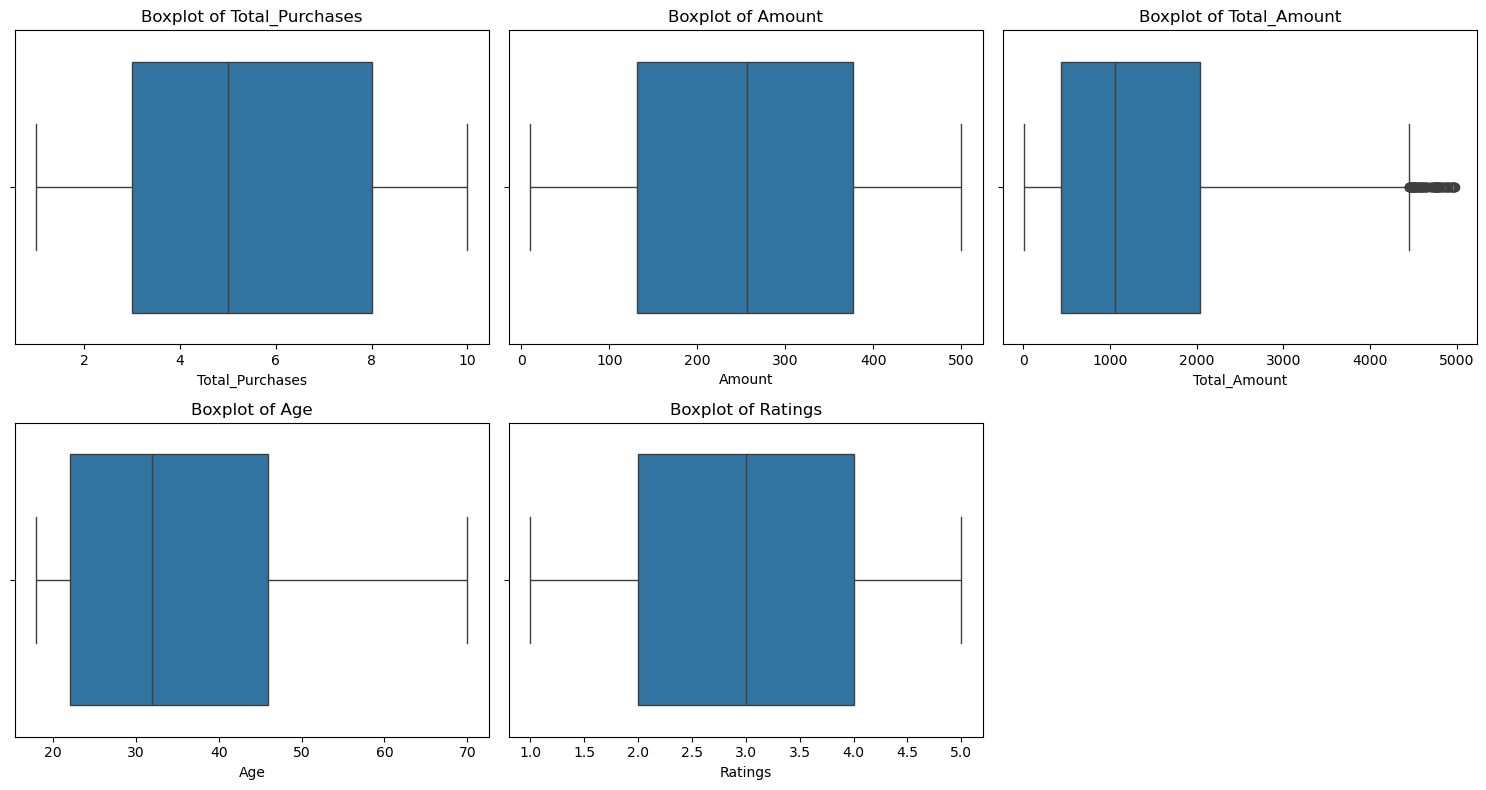

Total_Purchases outliers count: 0
Amount outliers count: 0
Total_Amount outliers count: 92
Age outliers count: 0
Ratings outliers count: 0


In [12]:
# Extreme Values Check


# Columns to check
cols = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Ratings']

# 1. Boxplots for visualizing extremes
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 2. Detecting outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Print number of outliers per column
for col in cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} outliers count: {len(outliers)}")

In [13]:
## Given that the max Total_Amount is around 4983 (which could be realistic for high spenders), it might just be some heavy spenders rather than data errors.

In [14]:
## Checking outliers individually just in case
# Assuming you already have your 'outliers' boolean mask for Total_Amount
outliers_total_amount = (df['Total_Amount'] > df['Total_Amount'].quantile(0.99))  # top 1% as example

# Extract those rows
outlier_rows = df[outliers_total_amount]

# Show summary info and some sample rows
print(outlier_rows[['Customer_ID', 'Total_Amount', 'Total_Purchases', 'Age', 'Gender']].describe())
print(outlier_rows.head(10))

        Customer_ID  Total_Amount  Total_Purchases        Age
count          98.0     98.000000        98.000000  98.000000
mean   51655.408163   4672.554397         9.908163  35.551020
std    26569.236967    167.241829         0.290280  14.914963
min         10586.0   4440.658927         9.000000  19.000000
25%        26522.75   4515.643744        10.000000  22.000000
50%         48042.0   4647.431589        10.000000  33.500000
75%         71926.5   4789.705527        10.000000  46.000000
max         99760.0   4983.048474        10.000000  70.000000
        Transaction_ID  Customer_ID             Name                 Email  \
83658          8936649        46733       Brenda Kim    Thomas80@gmail.com   
106351         9301998        87306  Richard Skinner   Matthew93@gmail.com   
198569         1465650        28833    Vincent Doyle  Kimberly63@gmail.com   
133412         5512542        53696    Kathleen Beck      Ryan42@gmail.com   
195787         1518407        24224  Danielle Torres

In [15]:
##### Observations on Outliers in Total_Amount

#All identified outliers have very high purchase amounts (above 4,400), which aligns with the top 1% of the dataset.
#The `Total_Purchases` for these entries is mostly 9 or 10, near the dataset's maximum.
#The age of these customers ranges from 19 to 70, which falls within the expected adult age range.
#These outliers come from diverse countries, including the USA, UK, Canada, Germany, and Australia.
#Product categories and brands vary widely, covering groceries (Pepsi), electronics (Apple, Sony), clothing (Zara, Nike), and books.
#Customer feedback for these entries is mixed, ranging from "Good" and "Excellent" to "Bad" and "Average".
#Ratings also vary between 1 and 4.

### Interpretation: These outliers represent high-value, frequent customers rather than data errors or anomalies. 
#Their presence is reasonable, reflecting loyal customers or big spenders in the dataset.
#Given their meaningful contribution, it makes sense to keep them in the regression analysis, 
#but we should be aware that they may influence the model results. 

#####To ensure robustness, it is recommended to fit regression models both with and without these outliers and compare the outcomes.

In [17]:
## Cheking median, mean and max
columns = ['Total_Purchases', 'Amount', 'Total_Amount', 'Age', 'Ratings']

for col in columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    max_val = df[col].max()
    print(f"{col} - Mean: {mean_val}, Median: {median_val}, Max: {max_val}")

Total_Purchases - Mean: 5.394200225432933, Median: 5.0, Max: 10.0
Amount - Mean: 254.65856519730707, Median: 256.6646488, Max: 499.9966805
Total_Amount - Mean: 1374.0137453106106, Median: 1053.939697, Max: 4983.048474
Age - Mean: 35.43682754380572, Median: 32.0, Max: 70.0
Ratings - Mean: 3.1567783584383644, Median: 3.0, Max: 5.0


In [18]:
## These values help us understand the central tendencies and the range of our data. 
#The means and medians being close suggests fairly symmetric distributions for most variables, 
#except possibly Total_Amount, which has a higher max indicating some high spenders.

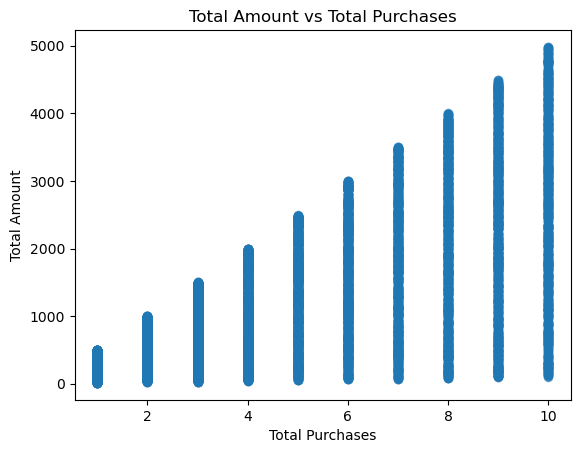

In [21]:
## 4. Exploring Data Visually 
plt.scatter(df['Total_Purchases'], df['Total_Amount'], alpha=0.5)
plt.title('Total Amount vs Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.show()

In [19]:
#### Hypothesis :  
#There is a positive correlation between the number of purchases and the total amount spent by customers.  
#We expect that customers who make more purchases will spend more money overall.

In [23]:
## 6. Reshaping the variables into Numpy arrays , with x being the independent variable and y being the dependent

X = df['Total_Purchases'].values.reshape(-1, 1)  # Independent variable
y = df['Total_Amount'].values  # Dependent variable

In [24]:
X

array([[7.],
       [7.],
       [7.],
       ...,
       [9.],
       [1.],
       [6.]])

In [25]:
y

array([2350.802482  ,  605.9913443 ,  676.659578  , ..., 3172.002246  ,
         78.20089151, 1950.065223  ])

In [26]:
## 7. Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
###8. Regression Analysis

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting on test set
y_pred = model.predict(X_test)

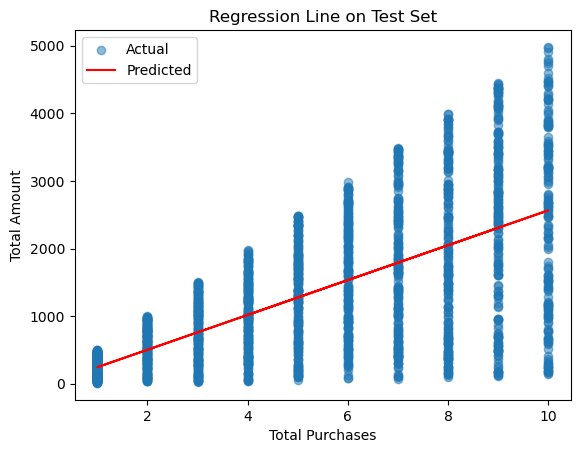

In [30]:
# 9. Creating a plot that shows the regression line on the test set
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Regression Line on Test Set')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.legend()
plt.show()

In [31]:
# Step 11 
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Create a DataFrame comparing actual vs predicted
comparison_df = pd.DataFrame({
    'Actual_Total_Amount': y_test.flatten(),
    'Predicted_Total_Amount': y_pred.flatten()
})

print(comparison_df.head(10))  # show first 10 rows

Mean Squared Error: 754769.5601671883
R2 Score: 0.3969925138359618
   Actual_Total_Amount  Predicted_Total_Amount
0          1451.765088             1017.074998
1           972.572166             1017.074998
2           798.515440             1017.074998
3           278.909077             1274.848779
4            57.489330              243.753657
5           835.577437              501.527437
6           135.451861              501.527437
7           247.997834             1274.848779
8           484.027022             1274.848779
9          3993.864842             2048.170120


In [38]:
# Step 12. Comparisong in a dataframe.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(10)

Actual    Predicted
0  1451.765088  1017.074998
1   972.572166  1017.074998
2   798.515440  1017.074998
3   278.909077  1274.848779
4    57.489330   243.753657
5   835.577437   501.527437
6   135.451861   501.527437
7   247.997834  1274.848779
8   484.027022  1274.848779
9  3993.864842  2048.170120

In [35]:
#13. Thoughts on how well the model performed
### Interpretation of Linear Regression Results

#The model’s Mean Squared Error (MSE) is quite high, 
#meaning the average difference between the actual and predicted total amounts is large.
#This tells us the model makes some noticeable errors in prediction.
#Overall, the model shows a moderate fit
#it’s useful to predict spending from purchases, but there’s room for improvement by including more variables or using different models.

#The analysis shows that when customers buy more things, they usually spend more money overall.
#So, there is a clear positive connection between the number of purchases and the total amount spent.
#But, the predictions from the model aren’t super accurate. 
#There’s quite a bit of difference between what the model predicts and the actual amounts spent. 
#The model explains about 40% of the spending based on the number of purchases, which means other factors are also important.
#In short, the number of purchases helps us understand spending, but we’d need more information to predict spending better.

In [36]:
# The rest of the 60% is influenced by other things the model didnt include, could be costumer income, product types,discounts, gender, etc.

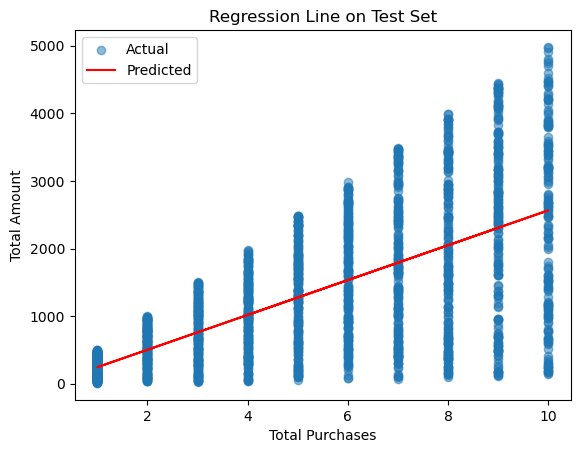

In [41]:
##Saving viz

path = os.path.expanduser('~/Desktop/regression_line_test_set.png')

plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Regression Line on Test Set')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.legend()
plt.savefig(path) 
plt.show()